In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df0 = pd.read_csv('extracted_features.csv')

In [3]:
df1 = pd.read_csv('extracted_featuresPD.csv')

In [4]:
df1['status'] = 1
df0['status'] = 0

In [5]:
combined_df = pd.concat([df1, df0], ignore_index=True)

In [6]:
combined_df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),NHR,HNR,RPDE,DFA,Spread2,D2,PPE,status
0,126.353888,137.019936,120.319498,0.073286,13.645093,0.882038,0.011980,0.074907,1.805122e-15,0.620028,1
1,110.262920,139.360201,101.559411,0.064598,15.480307,0.893800,0.031702,0.066802,3.741641e-03,0.134044,1
2,236.978227,243.821467,216.051657,0.053526,18.682661,0.854475,0.001874,0.063927,2.267745e+00,0.115779,1
3,263.086609,316.902456,86.026909,0.058129,17.203112,0.841544,0.318238,0.065729,1.927009e+00,0.217718,1
4,161.322442,167.325671,152.281397,0.048261,20.720847,0.880209,0.174828,0.086217,1.602417e-15,0.744524,1


In [7]:
y = combined_df.pop('status')

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(combined_df)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [11]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
y_train_preds = rfc.predict(X_train)
y_val_preds = rfc.predict(X_test)

In [13]:
from joblib import dump

dump(rfc, '../models/Custom_model.joblib')

['../models/Custom_model.joblib']

In [14]:
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import f1_score as f1s
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
accuracy = acs(y_train, y_train_preds)
F1 = f1s(y_train, y_train_preds)
conf_matrix = confusion_matrix(y_train, y_train_preds)
report = classification_report(y_train, y_train_preds)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1: {F1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{report}")

Accuracy: 1.0000
F1: 1.0000
Confusion Matrix:
[[35  0]
 [ 0 29]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        29

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [16]:
accuracy = acs(y_test, y_val_preds)
F1 = f1s(y_test, y_val_preds)
conf_matrix = confusion_matrix(y_test, y_val_preds)
report = classification_report(y_test, y_val_preds)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1: {F1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{report}")

Accuracy: 0.5882
F1: 0.6316
Confusion Matrix:
[[4 2]
 [5 6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.67      0.53         6
           1       0.75      0.55      0.63        11

    accuracy                           0.59        17
   macro avg       0.60      0.61      0.58        17
weighted avg       0.64      0.59      0.60        17



ROC AUC Score: 1.0000


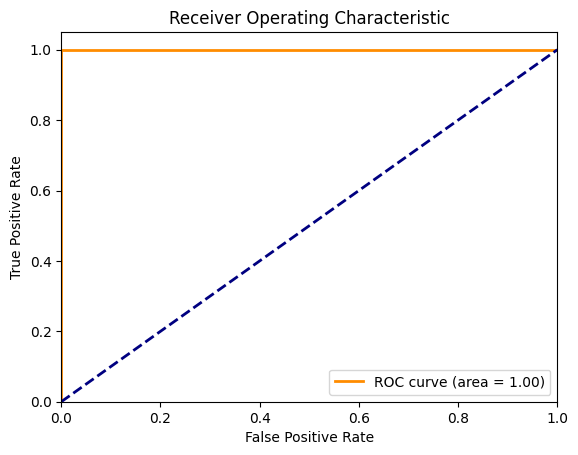

In [17]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Get the probability scores for the test set
y_train_prob = rfc.predict_proba(X_train)[:, 1]  # Probability estimates for the positive class

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_train, y_train_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

ROC AUC Score: 0.7500


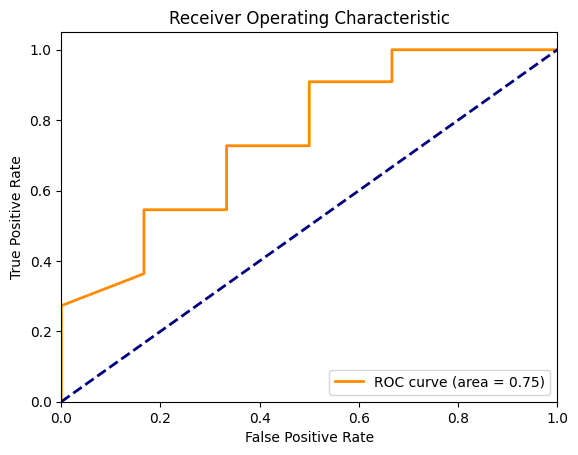

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Get the probability scores for the test set
y_valid_prob = rfc.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_valid_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_valid_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()